In [1]:
from models import *
from viz import *
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

gen = ImageDataGenerator()
PATH='../data/CINIC-10/'


batch_size = 256
target_size = (32, 32)

train_gen = ImageDataGenerator(rescale=1./255)#,
#                               rotation_range=15,
#                               shear_range=0.2,
#                               zoom_range=0.2)
test_gen = ImageDataGenerator(rescale=1./255)
#valid_gen = ImageDataGenerator(rescale=1./255)

train_set = train_gen.flow_from_directory(PATH+'/train',
                                          batch_size=batch_size,
                                          target_size=target_size,
                                          class_mode='categorical')

test_set = test_gen.flow_from_directory(PATH+'/test',
                                        batch_size=batch_size,
                                        target_size=target_size,
                                        class_mode='categorical')

#valid_set = valid_gen.flow_from_directory(PATH+'/valid',
#                                          target_size=target_size,
#                                          class_mode='categorical')

Using TensorFlow backend.


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [2]:
def run_cinic10(name, train_set, valid_set,
                epochs=10, lr=0.001):
    model = create_model(name, 
                         (target_size[0], target_size[1], 3), 
                         10, 
                         epochs=epochs, 
                         lr=lr
                         )
    print(model.summary())
    print_model(model, f"img/{name}.png")
    
    # Train the model
    tensorboard = TensorBoard(log_dir=f'logs/{name}')
    
    if lr == True:
        callbacks = [tensorboard, ReduceLROnPlateau()]
    else:
        callbacks = [tensorboard]
    history = model.fit(train_set,
                                  validation_data=valid_set, 
                                  epochs=epochs,
                                  verbose=1,
                                  callbacks=callbacks)
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    return history



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 352 steps, validate for 352 steps
Epoch 1/20
352/352 [==============================] - 152s 433ms/step - loss: 1.8835 - accuracy: 0.3121 - val_loss: 3.4846 - val_accuracy: 0.1059
Epoch 2/20
352/352 [==============================] - 123s 351ms/step - loss: 1.5876 - accuracy: 0.4141 - val_loss: 1.5266 - val_accuracy: 0.4425
Epoch 3/20
352/352 [==============================] - 187s 532ms/step - loss: 1.4652 - accuracy: 0.4597 - val_loss: 1.4352 - val_accuracy: 0.4710
Epoch 4/20
352/352 [==============================] - 157s 446ms/step - loss: 1.3795 - accuracy: 0.4930 - val_loss: 1.4397 - val_accuracy: 0.4786
Epoch 5/20
352/352 [==============================] - 102s 290ms/step - loss: 1.3129 - accuracy: 0.5188 - val_loss: 1.5594 - val_accuracy: 0.4408
Epoch 6/20
352/352 [==============================] - 101s 287ms/step - loss: 1.2649 - accuracy: 0.5373 - val_loss: 1.2578 - val_accuracy: 0.5403
Epoch 7/20
352/352 [==============================] - 101s 288ms/step - loss: 1.

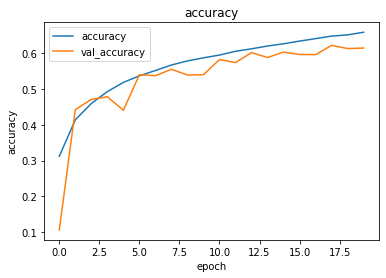

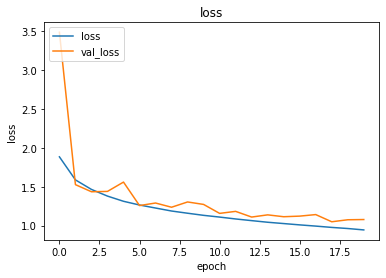

In [4]:
v1_history = run_cinic10('cinic_v1', train_set, test_set, epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

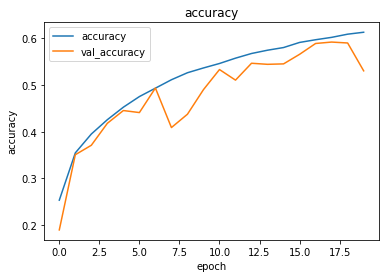

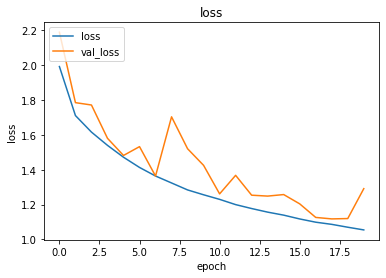

In [3]:
v2_history = run_cinic10('cinic_v2', train_set, test_set, epochs=20)

In [ ]:
v3_history = run_cinic10('cinic_v3', train_set, test_set, epochs=20, lr=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
analyse_accuracy([v1_history, v2_history, v3_history], 
                 ['cnn1_v1', 'cnn1_v2', 'cnn1_v3'])